<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 1
#### Lugano Damian


## Consigna

Dado el siguiente circuito:



<img src="./circuito.png" align="center" width="720" /> 

1. Obtener la función transferencia $ \frac{V2}{V1}$ ( módulo , fase y diagrama de polos y ceros)
2. ¿Qué tipo de filtro es?
3. Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?
4. Simule la función transferencia normalizada (Python, Matlab, etc.).
5. Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  $\frac{R2}{R1}=1$ ; $R3=1K\Omega$ y $C=1\mu F$
6. ¿Qué utilidad podría tener este tipo de circuitos?

#### Bonus:

+1 Obtener una RED normalizada que responda a la función hallada en 3)

+1 Verifique los resultados de 1 y 2 mediante el módulo de simulación simbólica SymPy.

+1 Presentación en jupyter notebook

## Punto 1

Planteando el teorema de nodos:

\begin{gather}
V_x(G_1+G_2)=V_1.G_1 + V_2.G_2 \hspace{1cm} (1)\\
V_x(S C_1 + G_3 )=V_1.S C_1  \hspace{1cm} (2)\\
\end{gather}


De (2)  
\begin{equation}
V_x=V_1 \frac{S C_1}{S C_1+G_3}   \hspace{1cm} (3)
\end{equation}

Luego (3) en (1)
\begin{equation}
V_1 \frac{S C_1}{S C_1+G_3} (G_1+G_2) = V_1 G_1 + V_2 G_2
\end{equation}

Operando algebraicamente

\begin{equation}
V_1 \frac{S C_1 G_2 - G_1 G_3}{S C_1+G_3}=V_2 G_2
\end{equation}


Por último la transferencia queda:

\begin{equation}
T(s)=\frac{V_2}{V_1}=\frac{S-\frac{R_2}{R_1 R_3 C_1} }{S + \frac{1}{R_3 C_1} }
\end{equation}

Módulo y fase:

\begin{equation}
|T(jw)|=\frac{ \sqrt{ \frac{R_2^2}{(R_1 R_3 C_1)^2} + \omega^2 } } { \sqrt{ \frac{1}{(R_3 C_1}^2 + \omega^2}}
\end{equation}

\begin{equation}
\angle T(jw)= arctg(\frac{\omega}{\frac{-R_2}{R_1 R_3 C_1}}) -arctg(\frac{\omega}{\frac{1}{R_3 C_1}})
\end{equation}

Diagrama de polos y ceros:

<img src="./pzmap.png" align="center" width="1020" /> 

Gráfico de modulo y fase:

<img src="./ModFase.png" align="center" width="720" /> 



## Punto 2

Si $R1=R2$ el sistema se comporta como un filtro pasatodo con ganancia unitaria $G=1$. Por otro lado, en el resto de los casos, también será un pasatodo que amplificará si $R2>R1$ y atenuará si $R2<R1$

## Punto 3 

Se elige $\omega$ como norma de frecuencia $\Omega_\omega=\frac{1}{R_3 C}$. Por lo tanto se hace un cambio de varible $ \$=\frac{S}{\Omega_\omega}$

\begin{equation}
T(\$)=\frac{\$\Omega_\omega-\frac{R_2}{R_1}\Omega_\omega}{\$ \Omega_\omega + \Omega_\omega} \hspace{1cm} \Longrightarrow \hspace{1cm} T(\$)=\frac{\$ - \frac{R_2}{R_1} }{\$ + 1}
\end{equation}

De la norma de frecuencia:

\begin{equation}
\omega0=\frac{1}{R_3 C}=1 \hspace{1cm} \Longrightarrow \hspace{1cm} C=\frac{1}{R_3}
\end{equation}

Por lo que la implicancia circuital es que numericamente $C=\frac{1}{R_3}$

## Punto 4
#### Simulación en Python


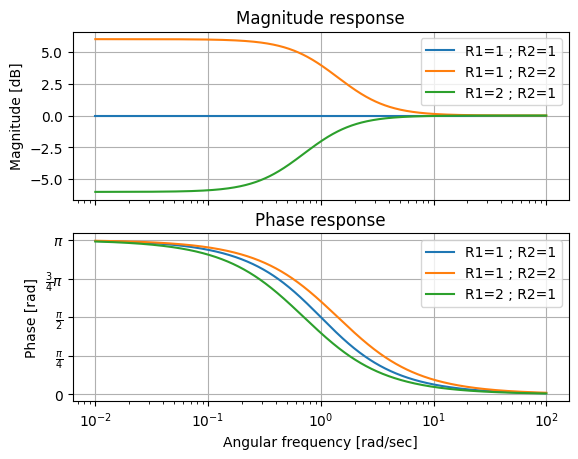

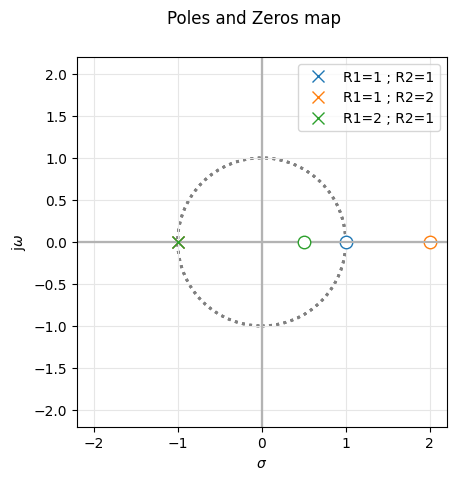

In [1]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#Componentes
C1=1
R1=[1,1,2]
R2=[1,2,1]
R3=1

w0 = 1/(R3*C1)

plt.close('all')


for ii in range(len(R1)):
    
    my_tf = TransferFunction( [1, -R2[ii]/(R1[ii]*R3*C1)], [1, 1/(R3*C1)] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'R1={:d} ; R2={:d}'.format(R1[ii], R2[ii])  )
    
    pzmap(my_tf, fig_id=2, filter_description = 'R1={:d} ; R2={:d}'.format(R1[ii], R2[ii]) )

## Punto 5

#### Simulación en python con valores asignados a los componentes


Ahora se le asignaran los siguientes valores a los componentes y se repetirá la simulación en Python:

$\frac{R2}{R1}=1$ ; $R3=1K\Omega$ y $C=1\mu F$

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

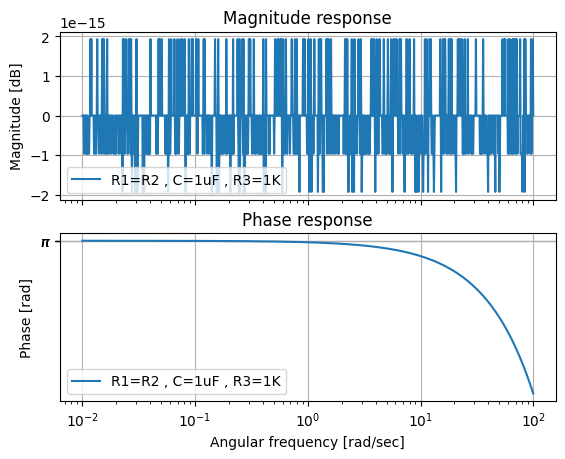

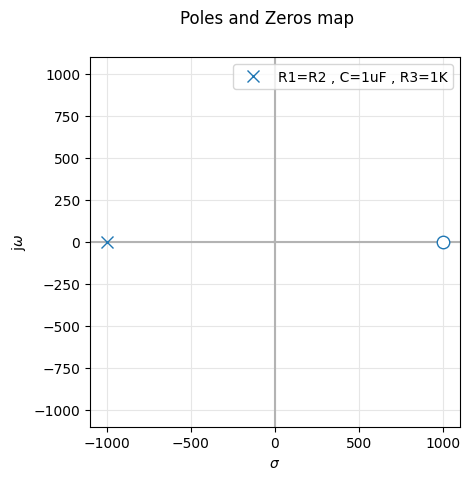

In [2]:
#Componentes
C1=1e-6
R1=1
R2=1
R3=1000

w0 = 1/(R3*C1)

plt.close('all')

my_tf = TransferFunction( [1, -R2/(R1*R3*C1)], [1, 1/(R3*C1)] )

bodePlot(my_tf, fig_id=1, filter_description = 'R1=R2 , C=1uF , R3=1K' )

pzmap(my_tf, fig_id=2, filter_description = 'R1=R2 , C=1uF , R3=1K' )

En los gráficos obtenidos de la simulación se puede observar que el diagrama del módulo presenta picos. Esto es debido a errores de calculo de la herramienta ya que la amplitud de los picos es del orden de 2e-15 dB. Por lo tanto, se puede asumir que la ganancia del filtro está en el orden de 0dB. 

Por otro lado tambien se puede ver que el gráfico de la fase está cortado en el eje de frecuencia, esto es porque no se pudo agrandar dicho eje para poder ver el gráfico en su totalidad.

#####  Simulación en LTspice con valores asignados a los componentes

Como los gráficos obtenidos de la simulación en python no se pueden visualizar bien. Se simuló el circuito en LTspice. A continuación los resultados:

<img src="./SchLTSpice.png" align="center" width="720" /> 


<img src="./SimLTspice.png" align="center" width="720" /> 

Como se puede observar, los gráficos del módulo y la fase obtenidos en el simulador fueron muy parecidos a los obtenidos mediante el desarrollo de la función transferencia.

## Punto 6

Los pasatodos pueden utilizarse como corrector de fase para frecuencias en especifico, teniendo en cuenta que en $\omega0$ la fase sera de $\pi/2$. Además también pueden utilizarse para generar delays de señales. Por otro lado, cuando $R_1$ y $R_2$ son distintos, el sistema amplificará o atenuará. Sin embargo, no es un buen amplificador ya que su ganancia no será constante al variar la frecuencia. 

## Bonus

### Red normalizada

Tomo como norma $\hspace{0.5cm} \Omega_z=R_3 \hspace{1cm} \Longrightarrow \hspace{1cm} R_3'=\frac{R_3}{\Omega_z} \hspace{0.5cm}$ entonces normalizo $ \hspace{0.5cm} R_3'=1 \hspace{0.5cm}$ Por lo tanto $\hspace{0.5cm} C'=\Omega_z C = R_3 C\hspace{0.5cm}$ 

Donde, usando la expresión: $\hspace{0.5cm} C=1/R_3 \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} C'=1 $

Luego $ \hspace{0.5cm} R_1'=R_1/\Omega_z=R_1/R_3 \hspace{0.5cm} y \hspace{0.5cm} R_2'=R_2/\Omega_z=R_2/R_3$

Ahora se asumirá $\hspace{0.5cm} R_1=R_3 \hspace{0.5cm}$ y $\hspace{0.5cm} R_2=R_3 \hspace{0.5cm}$ de manera que $\hspace{0.5cm} R_1'=1 \hspace{0.5cm} y \hspace{0.5cm} R2'=1$ 

Por lo que finalmente la red normalizada quedrá como:

<img src="./RedNormalizada.png" align="center" width="720" /> 